In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

In [2]:
df = pd.read_csv('datasets_228_482_diabetes.csv')

In [3]:
X = df.iloc[:,0:8]
y = df.iloc[:,8:9]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [5]:
clf = LogisticRegression(C=10,
                         solver='liblinear').fit(X_train, y_train.values.ravel())

clf.score(X_test, y_test)

0.7795275590551181

In [6]:
y_pred = clf.predict(X_test)

In [7]:
print(accuracy_score(y_test, y_pred))

0.7795275590551181


In [8]:
print(confusion_matrix(y_test, y_pred))

[[140  18]
 [ 38  58]]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       158
           1       0.76      0.60      0.67        96

    accuracy                           0.78       254
   macro avg       0.77      0.75      0.75       254
weighted avg       0.78      0.78      0.77       254



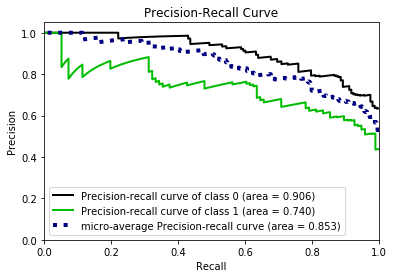

In [10]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_precision_recall(y_test, predicted_probas)
plt.show()

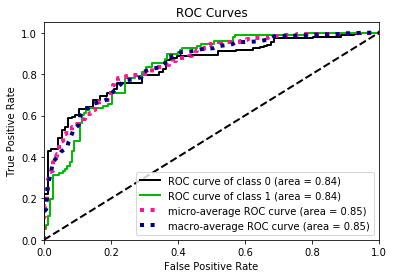

In [11]:
predicted_probas = clf.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

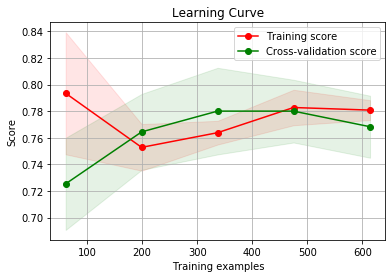

In [12]:
skplt.estimators.plot_learning_curve(clf, X, y.values.ravel())
plt.show()